## Import Modules

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
from tensorflow.keras.models import load_model
from IPython.display import Image

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13737120416186170199,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 382977134001811755
 physical_device_desc: "device: XLA_CPU device"]

In [3]:
model = load_model("./checkpoints/generator.h5", compile=False)
# model.summary()

In [4]:
image_url = "https://icdn2.digitaltrends.com/image/digitaltrends/galaxy-s9-camera-low-light-palau-nacional-1500x1000.jpg" # @param {type:"string"}
image_name = os.path.basename(image_url)
!wget {image_url}
!mv {image_name} ./tmp/{image_name}
image_path = f"./tmp/{image_name}"

--2020-04-13 15:44:45--  https://icdn2.digitaltrends.com/image/digitaltrends/galaxy-s9-camera-low-light-palau-nacional-1500x1000.jpg
Resolving icdn2.digitaltrends.com (icdn2.digitaltrends.com)... 151.101.194.49, 151.101.130.49, 151.101.66.49, ...
Connecting to icdn2.digitaltrends.com (icdn2.digitaltrends.com)|151.101.194.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 334305 (326K) [image/jpeg]
Saving to: ‘galaxy-s9-camera-low-light-palau-nacional-1500x1000.jpg’

galaxy-s9-camera-lo 100%[===================>] 326.47K  1.49MB/s    in 0.2s    

2020-04-13 15:44:46 (1.49 MB/s) - ‘galaxy-s9-camera-low-light-palau-nacional-1500x1000.jpg’ saved [334305/334305]



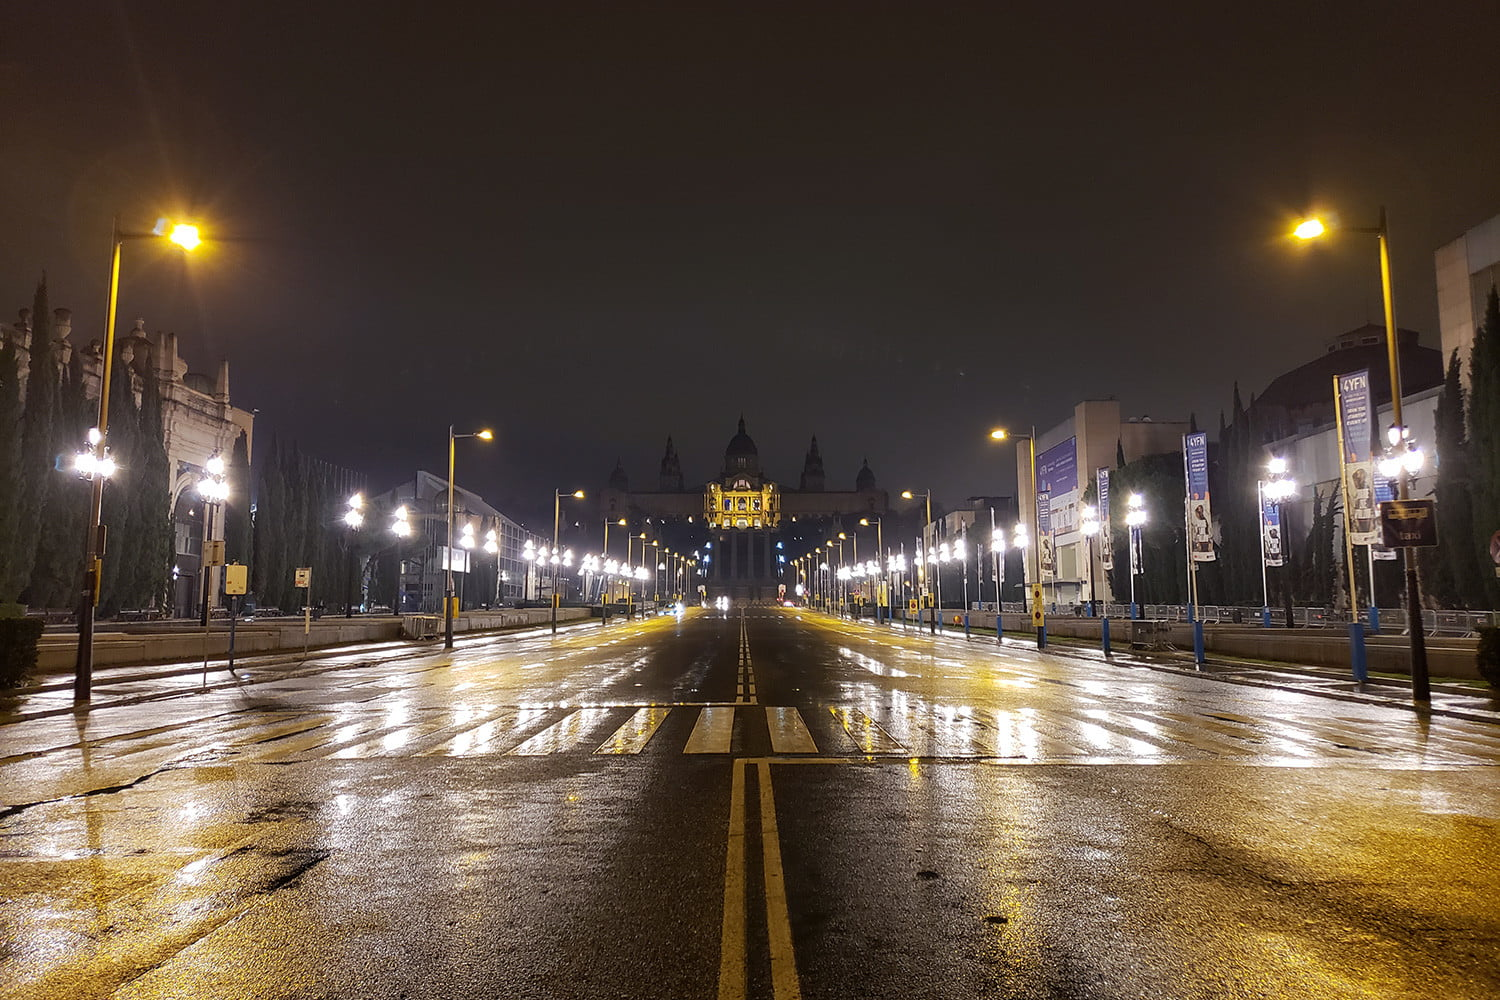

In [5]:
display(Image(image_path))

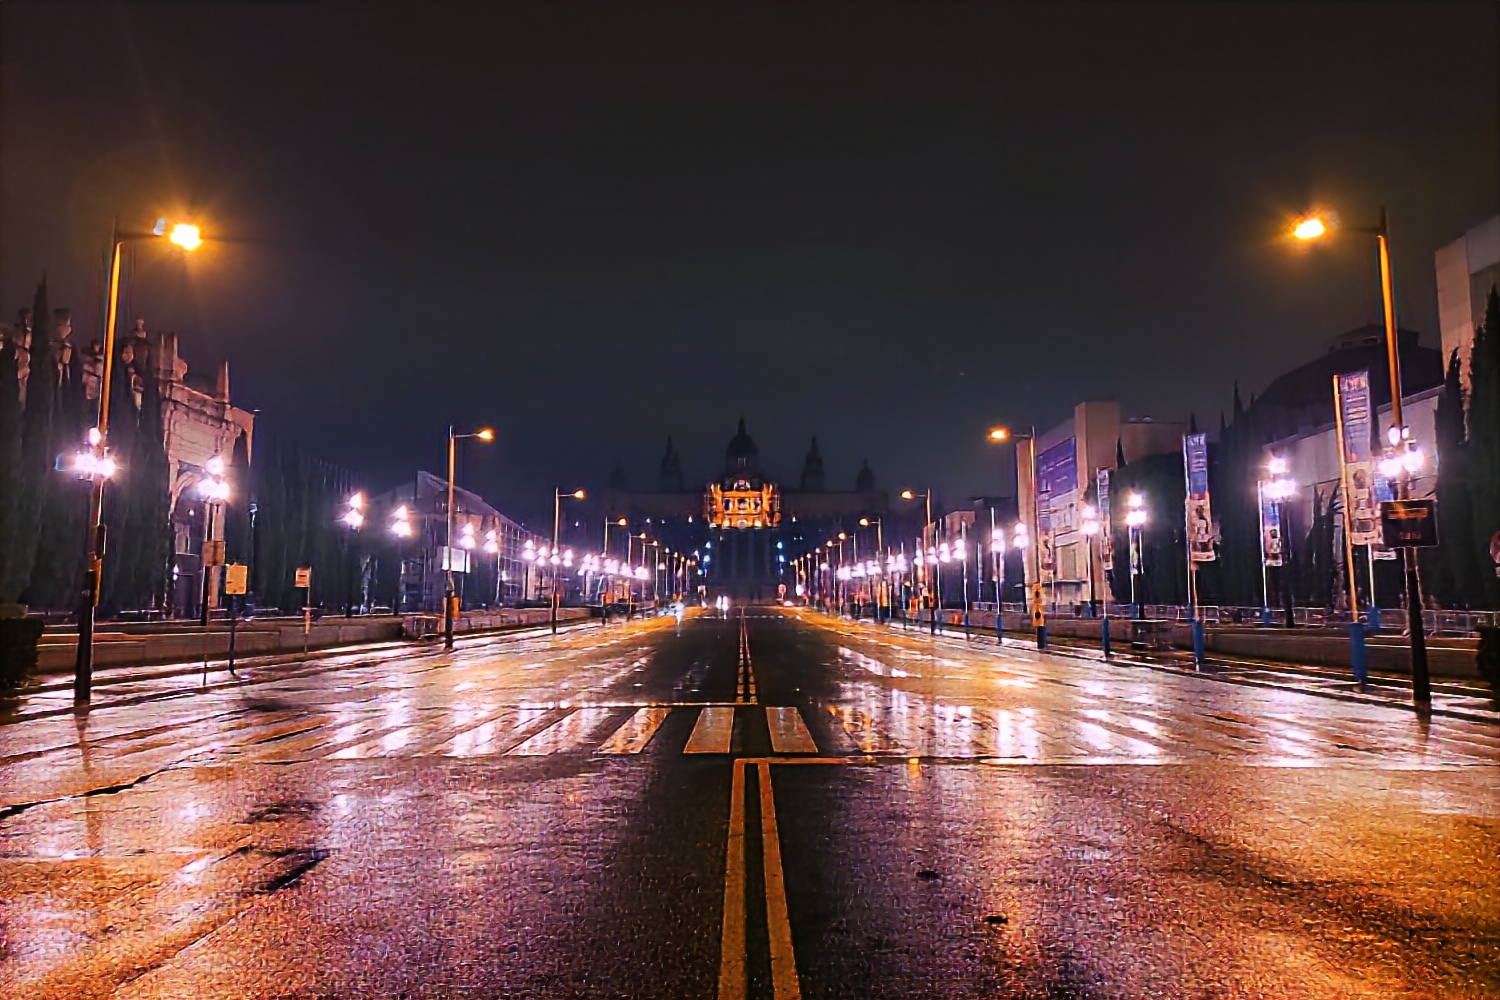

In [6]:
image = tf.image.decode_jpeg(tf.io.read_file(image_path)) 
image = tf.image.resize(image, (1000, 1500))/ 127.5 - 1
enhanced = model(tf.expand_dims(image, axis=0))[0]
display(Image(data=tf.image.encode_jpeg(tf.cast((enhanced+1)*127.5, dtype=tf.uint8)).numpy()))